In [1]:
import numpy as np
from sklearn import metrics
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb
from preprocess import *

crook = Preprocess('Ilhan', 20)
X = crook.td_matrix.toarray()

08/20/2019 03:27:27 PM | INFO | Processing Tweets from Ilhan


istandwithilhan & 1.0
struggle & 0.7927974683178989
cosign & 0.7833171469235927
suffering & 0.7455088452588212
woah & 0.7311076349291042
point & 0.7311076349291042
coverage & 0.7245398195218251
thankful & 0.7071067811865475
team & 0.7071067811865475
voting & 0.6873127582915157
cruelty & 0.6822621388794573
hit & 0.6822621388794573
iran & 0.6763308713768504
enough & 0.6716469619485599
piece & 0.6695239128666137
liberty & 0.653992293984309
zubeda & 0.6489732178780772
paid & 0.6466357822177643
cost & 0.643645115895125
ghana & 0.6421957135156492


In [2]:
def cos_similarity(x, y):
    sol = (x.dot(y)) / (np.linalg.norm(x) * np.linalg.norm(y))
    return(sol)

n = X.shape[0]
A = np.zeros((n,n))

i = np.nditer(A, flags=['multi_index'])
while not i.finished:
    A[i.multi_index] = cos_similarity(X[i.multi_index[0],:], 
                                      X[i.multi_index[1],:])
    i.iternext()

In [3]:
eps = 10

# Generate final matrix A, and row normalized matrix M. 
Ak = metrics.pairwise.rbf_kernel(A, gamma=1./(2.*eps))
#M = A/A.sum(axis=1, keepdims=True)

# Get the eigenvalues/vectors of M. 
# We normalize by the first eigenvector. 
W, V = np.linalg.eig(Ak)

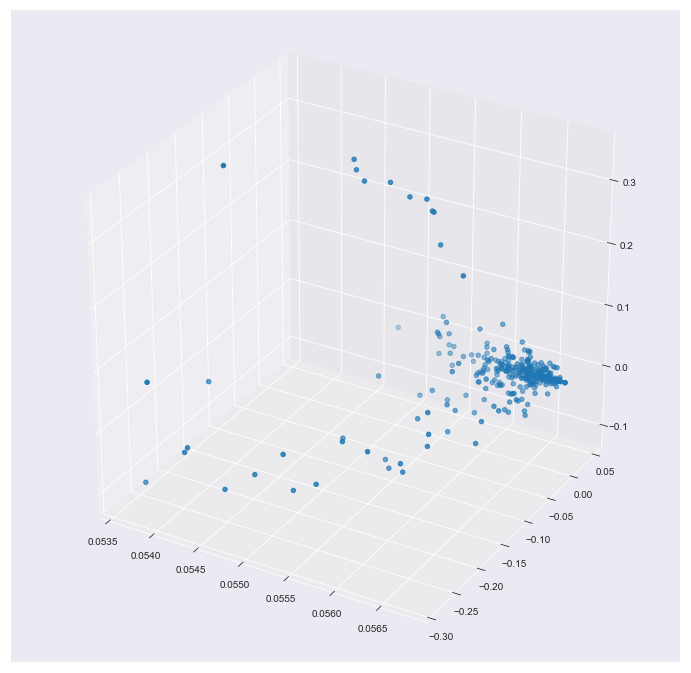

In [4]:
fig = plt.figure(figsize=(12,12))
sb.set_style('darkgrid')
ax = fig.add_subplot(projection='3d')
ax = plt.axes(projection='3d')
x = V[:,0]; y = V[:,1]; z = V[:,2]
ax.scatter3D(x, y, z)

In [5]:
from sklearn.cluster import KMeans

points = V
n_clusters = 10

# create kmeans object
kmeans = KMeans(n_clusters=n_clusters)
# fit kmeans object to data
kmeans.fit(points)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(points)

[[ 0.05643129 -0.05447297 -0.01325013 ... -0.04982446 -0.01721004
  -0.05862512]
 [ 0.05613573  0.01893064  0.02830198 ...  0.03666344  0.02443564
  -0.06523055]
 [ 0.05449853 -0.2537045  -0.08157941 ...  0.01348434 -0.08724778
   0.11890888]
 ...
 [ 0.05610657  0.03011046 -0.00320869 ...  0.05533839 -0.03513332
  -0.15409931]
 [ 0.05601114 -0.02394584 -0.05670377 ...  0.03182428 -0.06756806
  -0.06220174]
 [ 0.05604113  0.02997208 -0.0201473  ... -0.10262898 -0.00129286
   0.06230291]]


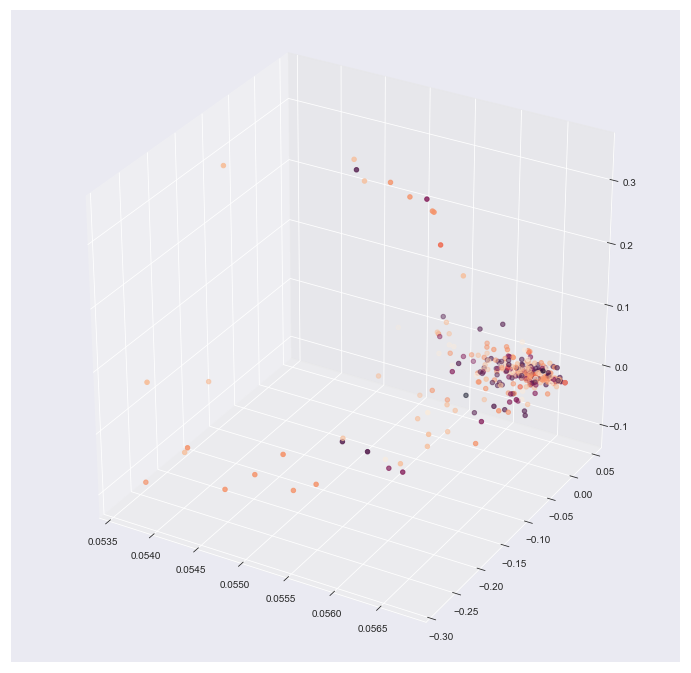

In [6]:
fig = plt.figure(figsize=(12,12))
sb.set_style('darkgrid')
ax = fig.add_subplot(projection='3d')
ax = plt.axes(projection='3d')
x = V[:,0]; y = V[:,1]; z = V[:,2]
ax.scatter3D(x, y, z, c=y_km)

In [7]:
terms = crook.tfidf.get_feature_names()
crook.td_matrix.shape

(317, 1511)

In [8]:
kmeans.labels_

array([3, 7, 1, 9, 2, 7, 2, 6, 7, 8, 9, 2, 9, 7, 8, 9, 7, 8, 6, 7, 2, 2,
       2, 8, 7, 7, 9, 2, 8, 2, 7, 8, 7, 8, 7, 2, 3, 8, 8, 7, 3, 7, 2, 3,
       7, 3, 2, 9, 7, 7, 8, 8, 2, 2, 7, 8, 3, 8, 7, 9, 1, 7, 3, 9, 2, 2,
       7, 7, 8, 7, 0, 8, 2, 8, 2, 8, 8, 2, 7, 7, 7, 3, 0, 2, 2, 2, 2, 8,
       8, 3, 9, 9, 8, 7, 6, 3, 2, 7, 7, 8, 7, 8, 9, 3, 3, 8, 3, 7, 8, 3,
       3, 7, 8, 7, 9, 9, 3, 7, 7, 7, 7, 7, 8, 9, 2, 8, 8, 2, 9, 3, 8, 8,
       9, 8, 2, 7, 3, 8, 7, 2, 2, 9, 7, 7, 2, 9, 8, 3, 2, 2, 8, 8, 8, 3,
       8, 8, 9, 8, 4, 7, 7, 2, 9, 7, 7, 8, 8, 8, 7, 2, 2, 8, 7, 7, 2, 7,
       7, 7, 3, 7, 3, 2, 3, 2, 7, 8, 7, 8, 8, 9, 7, 8, 7, 3, 3, 8, 7, 6,
       8, 2, 8, 7, 2, 7, 7, 7, 3, 2, 8, 6, 8, 9, 8, 2, 9, 3, 3, 8, 8, 2,
       3, 8, 8, 7, 3, 3, 2, 7, 9, 8, 7, 7, 3, 2, 8, 8, 3, 8, 6, 2, 7, 9,
       3, 8, 7, 7, 2, 2, 9, 3, 7, 2, 9, 8, 8, 8, 3, 3, 9, 7, 3, 8, 3, 9,
       2, 2, 7, 2, 7, 2, 2, 8, 7, 7, 2, 2, 2, 3, 7, 7, 7, 7, 2, 2, 2, 8,
       9, 8, 8, 7, 7, 7, 5, 8, 2, 2, 2, 7, 3, 9, 8,

In [9]:
from collections import Counter
Counter(kmeans.labels_)

Counter({3: 43, 7: 87, 1: 3, 9: 33, 2: 66, 6: 6, 8: 75, 0: 2, 4: 1, 5: 1})

In [11]:
data = pd.DataFrame(crook.clean_tweets_str)
data['cluster'] = kmeans.labels_
data[data['cluster'] == 6]

,0,cluster
7,bridge youth safe shelter service center help ...,6
18,workers fighting fair working conditions basic...,6
94,introduced zero waste act last week combat ong...,6
197,travel ban hurts many families fleeing war zon...,6
209,trump office give corporations big giveaways l...,6
238,horrendous act cowardice heart goes families a...,6


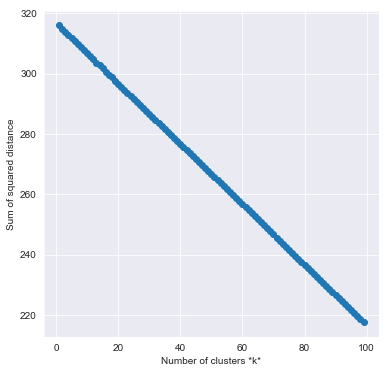

In [15]:
sse = []
list_k = list(range(1, 100))

for k in list_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(points)
    sse.append(kmeans.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [5]:
crook.tweets[1]

['This president would love nothing more than to divide our country based on race, religion, gender, orientation, abi… https://t.co/Lp0v1Rph9m',
 'Cancelling private and public student debt would boost 45 million Americans and the economy. \n\nWe spent 1/10th bail… https://t.co/v3qpvyxLzm',
 'We need to have accountability and transparency on how CBP will discipline their agents over the recent Facebook gr… https://t.co/yT4d13rOw4',
 'RT @ErinMayeQuade: This is beautiful https://t.co/52W41zplBV',
 'The first Pride was a riot. \n\n50 years after Stonewall, we’re still marching for equality. 💪🏽🏳️\u200d🌈\xa0#NOH8ontheHill… https://t.co/wjjCm3BUSD',
 'RT @SpeakerPelosi: Today in Ghana with the Congressional Black Caucus for the Year of Return, I had the honor to address Ghana’s Parliament…',
 "RT @gabemschneider: .@Ilhan lead 42 other members in an open letter to DHS, asking about the Trump administration's planned removal of hund…",
 'The Bridge for Youth is a safe shelter and a service c

In [9]:
crook.clean_tweets_str[1]

'cancelling private public student debt would boost million americans economy spent'

In [10]:
crook.tweets[1]

'Cancelling private and public student debt would boost 45 million Americans and the economy. \n\nWe spent 1/10th bail… https://t.co/v3qpvyxLzm'

In [1]:
import os, json
handles = os.listdir('tweet_data')
crooks = []
for handle in handles:
    try:
        tweet_ids = os.listdir('tweet_data/' + handle)
        tweet_path = '/'.join(['tweet_data', handle, tweet_ids[0]])
        with open(tweet_path, 'r') as f:
            tweet = json.load(f)
        crooks.append((tweet['user']['name'], handle))
    except IndexError:
        continue
        
import pandas as pd
out = pd.DataFrame(crooks)
out.to_csv('name_handle.csv', index=False)